In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
import joblib
from tensorflow.keras.models import load_model

In [4]:
# Load the model
mlp_model = load_model('/home/jupyter-edufitimana/Data/mlp_model.h5')
rf_model = joblib.load('/home/jupyter-edufitimana/Data/best_random_forest_model.pkl')
svm_model = joblib.load('/home/jupyter-edufitimana/Data/best_svm_model.pkl')
xgb_model = joblib.load('/home/jupyter-edufitimana/Data/best_xgboost_model.pkl')

In [5]:
df_SA=gpd.read_file("/home/jupyter-edufitimana/Data/all_points_data.shp")
df_SA.head() # make sure that the dataset has the same column arrangement as the training dataset

,label,Elevation,Slope,Aspect,NDVI,NDBI,Drainage,Land cover,Rainfall,geometry
0,NaN,0.218750,0.097933,0.076478,0.826337,0.337146,0.355742,0.25,0.526496,POINT (521887.188 4792209.012)
1,NaN,0.429348,0.199253,0.966813,0.779885,0.436805,0.389857,0.25,0.832533,POINT (518755.306 4794723.259)
2,NaN,0.057065,0.000000,0.000000,0.745773,0.490129,0.546609,0.25,0.499614,POINT (507039.048 4790045.920)
3,NaN,0.111413,0.236049,0.002774,0.716708,0.486728,0.571916,0.25,0.729381,POINT (502929.256 4784515.802)
4,NaN,0.275815,0.117709,0.312961,0.730239,0.381644,0.377492,0.25,0.576597,POINT (499763.905 4774400.882)


In [6]:
X_SA= df_SA.drop(labels =  ["label", "geometry"], axis=1) # we need to remove all the columns except the predictive features
X_SA.head()

,Elevation,Slope,Aspect,NDVI,NDBI,Drainage,Land cover,Rainfall
0,0.218750,0.097933,0.076478,0.826337,0.337146,0.355742,0.25,0.526496
1,0.429348,0.199253,0.966813,0.779885,0.436805,0.389857,0.25,0.832533
2,0.057065,0.000000,0.000000,0.745773,0.490129,0.546609,0.25,0.499614
3,0.111413,0.236049,0.002774,0.716708,0.486728,0.571916,0.25,0.729381
4,0.275815,0.117709,0.312961,0.730239,0.381644,0.377492,0.25,0.576597


In [7]:
# Predict flood susceptibility probabilities using the MLP model
prediction_SA = mlp_model.predict(X_SA).ravel()

# Round the predictions to 2 decimal places
prediction_SA_rounded = prediction_SA.round(2)

# Add the flood susceptibility probabilities to the dataframe
df_SA['Predicted Flood'] = prediction_SA_rounded

# The updated df_SA now contains a 'Predicted Flood' column with rounded flood susceptibility probabilities
df_SA.head(20)

63/63 [==============================] - 1s 2ms/step


,label,Elevation,Slope,Aspect,NDVI,NDBI,Drainage,Land cover,Rainfall,geometry,Predicted Flood
0,NaN,0.218750,0.097933,0.076478,0.826337,0.337146,0.355742,0.25,0.526496,POINT (521887.188 4792209.012),0.42
1,NaN,0.429348,0.199253,0.966813,0.779885,0.436805,0.389857,0.25,0.832533,POINT (518755.306 4794723.259),0.05
2,NaN,0.057065,0.000000,0.000000,0.745773,0.490129,0.546609,0.25,0.499614,POINT (507039.048 4790045.920),0.98
3,NaN,0.111413,0.236049,0.002774,0.716708,0.486728,0.571916,0.25,0.729381,POINT (502929.256 4784515.802),0.43
4,NaN,0.275815,0.117709,0.312961,0.730239,0.381644,0.377492,0.25,0.576597,POINT (499763.905 4774400.882),0.30
5,NaN,0.073370,0.043942,0.252474,0.815408,0.321684,0.441574,0.25,0.299001,POINT (525447.175 4787210.714),0.89
6,NaN,0.445652,0.199253,0.966813,0.853051,0.374565,0.445711,0.25,0.312814,POINT (528453.645 4793043.826),0.04
7,NaN,0.184783,0.378449,0.171023,0.743336,0.323115,0.324594,0.25,0.326143,POINT (502732.373 4774224.431),0.05
8,NaN,0.129076,0.156883,0.159003,0.640946,0.377406,0.485405,0.50,0.215201,POINT (511059.754 4788059.523),0.71
9,NaN,0.652174,0.231822,0.539331,0.807100,0.365618,0.314495,0.25,0.373159,POINT (524654.094 4790315.520),0.04


In [8]:
# Save the dataframe tp a shapefile in case of converting the points to raster using QGIS or Arcmap
df_SA.to_file("/home/jupyter-edufitimana/Data/Flood_sus_kigali.shp")

/tmp/ipykernel_368449/832058725.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_SA.to_file("/home/jupyter-edufitimana/Data/Flood_sus_kigali.shp")


In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the shapefile
df_SA = gpd.read_file("/home/jupyter-edufitimana/Data/Flood_sus_kigali.shp")

In [10]:
df_SA.head()

,label,Elevation,Slope,Aspect,NDVI,NDBI,Drainage,Land cover,Rainfall,Predicted,geometry
0,NaN,0.218750,0.097933,0.076478,0.826337,0.337146,0.355742,0.25,0.526496,0.42,POINT (521887.188 4792209.012)
1,NaN,0.429348,0.199253,0.966813,0.779885,0.436805,0.389857,0.25,0.832533,0.05,POINT (518755.306 4794723.259)
2,NaN,0.057065,0.000000,0.000000,0.745773,0.490129,0.546609,0.25,0.499614,0.98,POINT (507039.048 4790045.920)
3,NaN,0.111413,0.236049,0.002774,0.716708,0.486728,0.571916,0.25,0.729381,0.43,POINT (502929.256 4784515.802)
4,NaN,0.275815,0.117709,0.312961,0.730239,0.381644,0.377492,0.25,0.576597,0.30,POINT (499763.905 4774400.882)


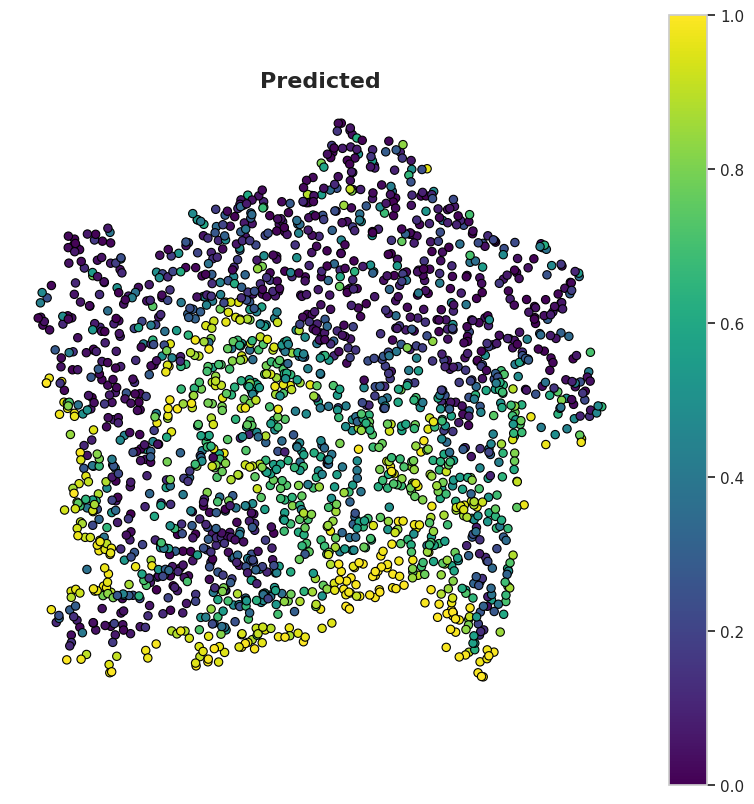

In [11]:


# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a figure and axis with larger size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the shapefile, coloring based on the FSM column
df_SA.plot(column='Predicted', cmap='viridis', linewidth=0.8, edgecolor='black', legend=True, ax=ax)

# Enhance the plot aesthetics
ax.set_title('Predicted', fontsize=16, fontweight='bold')
ax.set_axis_off()  # Remove axis for a cleaner look

# Add a color bar for better interpretation
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=df_SA['Predicted'].min(), vmax=df_SA['Predicted'].max()))
sm._A = []
#cbar = fig.colorbar(sm)
#cbar.set_label('FSM Value', fontsize=14)

# Show the plot
plt.show()


In [ ]:
#Do the rest in QGIS or ArcGIS